<a href="https://colab.research.google.com/github/Martinxmaina/Data-science/blob/main/EcommerceCustomers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
Boston = pd.read_csv('/content/drive/MyDrive/Boston.csv')
EcommerceCustomers = pd.read_csv('/content/drive/MyDrive/EcommerceCustomers.csv')


In [7]:
EcommerceCustomers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
EcommerceCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [9]:
EcommerceCustomers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


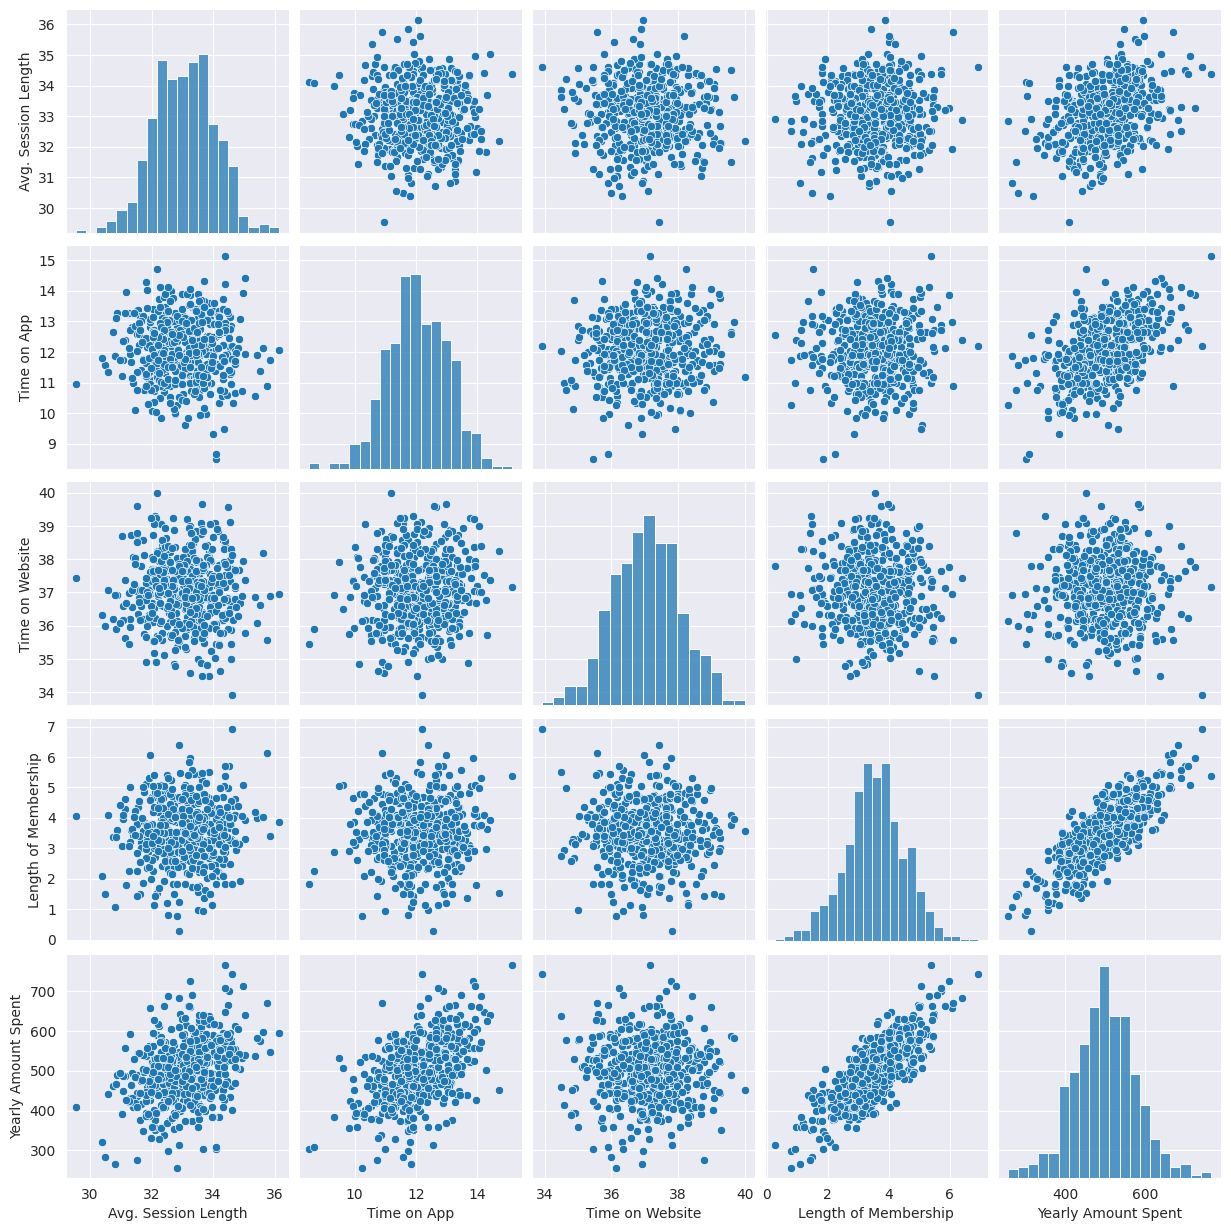

In [10]:
sns.set_style('darkgrid')
sns.pairplot(EcommerceCustomers)

(<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>,)

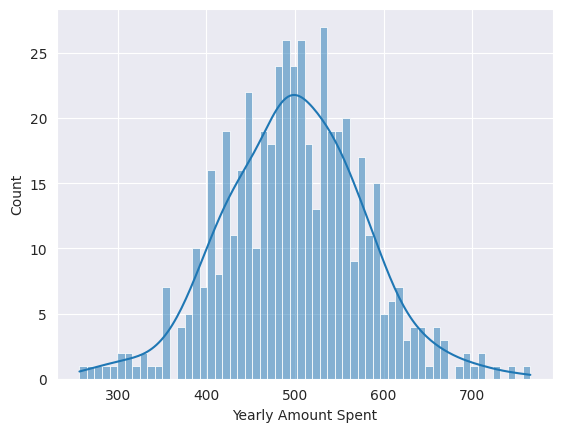

In [11]:
sns.histplot(EcommerceCustomers['Yearly Amount Spent'], kde=True, bins=60),

In [12]:
numerical_features = EcommerceCustomers.select_dtypes(include=np.number)

correlation_matrix = numerical_features.corr()


<Axes: >

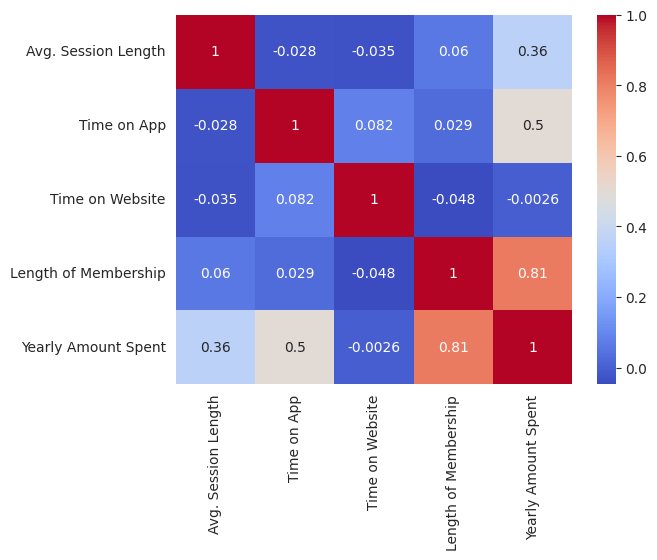

In [13]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [14]:
EcommerceCustomers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [15]:
EcommerceCustomers.drop('Email', axis=1, inplace=True)
EcommerceCustomers.drop('Address', axis=1, inplace=True)
EcommerceCustomers.drop('Avatar', axis=1, inplace=True)
#

In [16]:
EcommerceCustomers.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [18]:
EcommerceCustomers.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [44]:
X= EcommerceCustomers[['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']]

In [48]:
y= EcommerceCustomers['Yearly Amount Spent']

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
from sklearn.linear_model import LinearRegression

In [50]:
lm = LinearRegression()

In [51]:
lm.fit(X_train, y_train)

LinearRegression()

Lets check on the intercept

In [52]:
lm.intercept_

-1047.9327822502391

In [53]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [54]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [55]:
coef_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
